In [7]:
# conda activate aso_design
import pandas
from scripts.data_genertion.consts import *
from asodesigner.file_utils import read_human_genome_fasta_dict
from asodesigner.consts import *
all_data = pandas.read_csv(DATA_PATH / 'data_from_article_fixed.csv')


In [8]:
from scipy.stats import pearsonr, spearmanr

def print_correlations(df, name1, name2, p_value_threshold=None):
    if p_value_threshold is None:
        p_value_threshold = 1
    corr, p_value = pearsonr(df[name1], df[name2])
    if p_value < p_value_threshold:
        print(f"Feature: {name1:<35}, Pearson: {corr:<5.2f}, p-value: {p_value:<10.2} Target: {name2:<35}")
    corr, p_value = spearmanr(df[name1], df[name2])
    if p_value < p_value_threshold:
        print(f"Feature: {name1:<35}, Spearman: {corr:<5.2f}, p-value: {p_value:<10.2} Target: {name2:<35}")

Feture generation

In [9]:
# purine content
from niv_features import purine_content
from Bio.Seq import Seq

all_data['purine_content'] = all_data["Sequence"].apply(lambda x: purine_content(x))
sequence_features = ['purine_content']

In [10]:
# count_g_runs
from niv_features import count_g_runs
all_data['ggg_counts'] = all_data["Sequence"].apply(lambda x: count_g_runs(x))
sequence_features.append("ggg_counts")

In [11]:
#ENC
from niv_features import compute_ENC
all_data["ENC"] = all_data["Sequence"].apply(lambda x: compute_ENC(x))
sequence_features.append("ENC")

In [12]:
# palindromic count of 4 and 6 palindroms
from niv_features import palindromic_fraction
all_data['4 palindromic'] = all_data[SEQUENCE].apply(lambda x: palindromic_fraction(x,4))
sequence_features.append("4 palindromic")

all_data['6 palindromic'] = all_data[SEQUENCE].apply(lambda x: palindromic_fraction(x,6))
sequence_features.append("6 palindromic")


In [13]:
# entropy
from niv_features import seq_entropy
all_data["entropy"] = all_data["Sequence"].apply(lambda x: seq_entropy(x))
sequence_features.append("entropy")

In [14]:
#hairpin_score
from niv_features import hairpin_score
all_data["hairpin_score"] = all_data["Sequence"].apply(lambda x : hairpin_score(x))
sequence_features.append("hairpin_score")

In [15]:
#toxic_motif_count
from niv_features import toxic_motif_count
all_data["toxic_motif_count"] = all_data["Sequence"].apply(lambda x : toxic_motif_count(x))
sequence_features.append("toxic_motif_count")

In [16]:
# hairpin_dG_energy
from niv_features import hairpin_dG_energy
all_data["hairpin_dG_energy"] = all_data["Sequence"].apply(lambda x : hairpin_dG_energy(x))
sequence_features.append("hairpin_dG_energy")

In [17]:
#hairpin_tm
from niv_features import hairpin_tm
all_data["hairpin_tm"] = all_data["Sequence"].apply(lambda x : hairpin_tm(x))
sequence_features.append("hairpin_tm")


In [18]:
#tandem_repeats_score
from niv_features import tandem_repeats_score
all_data["tandem_repeats_score"] = all_data["Sequence"].apply(lambda x : tandem_repeats_score(x))
sequence_features.append("tandem_repeats_score")

In [ ]:
# dispersed_repeats_score
from niv_features import dispersed_repeats_score
all_data["dispersed_repeats_score"] = all_data["Sequence"].apply(lambda x : dispersed_repeats_score(x))
sequence_features.append("dispersed_repeats_score")


['purine_content',
 'ggg_counts',
 'ENC',
 '4 palindromic',
 '6 palindromic',
 'entropy',
 'hairpin_score',
 'toxic_motif_count',
 'hairpin_dG_energy',
 'hairpin_tm',
 'tandem_repeats_score',
 'dispersed_repeats_score']

In [38]:
#flexible_dinucleotide_fraction
from niv_features import flexible_dinucleotide_fraction
all_data["flexible_dinucleotide_fraction"] = all_data["Sequence"].apply(lambda x : flexible_dinucleotide_fraction(x))
sequence_features.append("flexible_dinucleotide_fraction")

In [40]:
#gc_skew
from niv_features import gc_skew
all_data["gc_skew"] = all_data["Sequence"].apply(lambda x : gc_skew(x))
sequence_features.append("gc_skew")

In [41]:
#gc_skew_ends
from niv_features import gc_skew_ends
all_data["gc_skew_ends"] = all_data["Sequence"].apply(lambda x : gc_skew_ends(x))
sequence_features.append("gc_skew_ends")

In [42]:
#at_skew
from niv_features import at_skew
all_data["at_skew"] = all_data["Sequence"].apply(lambda x : at_skew(x))
sequence_features.append("at_skew")

In [44]:
#stop_codon_count
from niv_features import stop_codon_count
all_data["stop_codon_count"] = all_data["Sequence"].apply(lambda x : stop_codon_count(x))
sequence_features.append("stop_codon_count")

In [45]:
#nucleotide_diversity
from niv_features import nucleotide_diversity
all_data["nucleotide_diversity"] = all_data["Sequence"].apply(lambda x : nucleotide_diversity(x))
sequence_features.append("nucleotide_diversity")

In [52]:
#cg_dinucleotide_fraction
import importlib
import niv_features
importlib.reload(niv_features)
from niv_features import cg_dinucleotide_fraction
all_data["cg_dinucleotide_fraction"] = all_data["Sequence"].apply(lambda x : cg_dinucleotide_fraction(x))
sequence_features.append("cg_dinucleotide_fraction")

In [53]:
#poly_pyrimidine_stretch
from niv_features import poly_pyrimidine_stretch
all_data["poly_pyrimidine_stretch"] = all_data["Sequence"].apply(lambda x : poly_pyrimidine_stretch(x))
sequence_features.append("poly_pyrimidine_stretch")

In [56]:
#dinucleotide_entropy
from niv_features import dinucleotide_entropy
all_data["dinucleotide_entropy"] = all_data["Sequence"].apply(lambda x : dinucleotide_entropy(x))
sequence_features.append("dinucleotide_entropy")

In [57]:
#gc_block_length
from niv_features import gc_block_length
all_data["gc_block_length"] = all_data["Sequence"].apply(lambda x : gc_block_length(x))
sequence_features.append("gc_block_length")

In [58]:
#at_rich_region_score
from niv_features import at_rich_region_score
all_data["at_rich_region_score"] = all_data["Sequence"].apply(lambda x : at_rich_region_score(x))
sequence_features.append("at_rich_region_score")

In [59]:
import numpy as np

all_data_no_nan = all_data.dropna(subset=[INHIBITION]).copy()
all_data_no_nan.loc[:, 'log_inhibition'] = -np.log(-all_data_no_nan[INHIBITION] + 100.001)

In [60]:
all_data_no_nan_human = all_data_no_nan[all_data_no_nan[CELL_LINE_ORGANISM] == 'human']
genes = all_data_no_nan[CANONICAL_GENE].copy()
genes_u = list(set(genes))
genes_u.remove('HBV')
genes_u.remove('negative_control')

In [61]:
from asodesigner.read_human_genome import get_locus_to_data_dict
import pickle
from asodesigner.consts import CACHE_DIR


cache_path = CACHE_DIR / 'gene_to_data_simple_cache.pickle'
if not cache_path.exists():
    gene_to_data = get_locus_to_data_dict(include_introns=True, gene_subset=genes_u)
    with open(cache_path, 'wb') as f:
        pickle.dump(gene_to_data, f)
else:
    with open(cache_path, 'rb') as f:
        gene_to_data = pickle.load(f)

In [62]:
from asodesigner.util import get_antisense

all_data_human_gene = all_data_no_nan_human[all_data_no_nan_human[CANONICAL_GENE].isin(genes_u)].copy()
PREMRNA_FOUND = 'pre_mrna_found'
SENSE_START = 'sense_start'
SENSE_LENGTH = 'sense_length'
SENSE_TYPE = 'sense_type'

found = 0
not_found = 0
all_data_human_gene[SENSE_START] = np.zeros_like(all_data_human_gene[CANONICAL_GENE], dtype=int)
all_data_human_gene[SENSE_LENGTH] = np.zeros_like(all_data_human_gene[CANONICAL_GENE], dtype=int)
all_data_human_gene[SENSE_TYPE] = "NA"
for index, row in all_data_human_gene.iterrows():
     gene_name = row[CANONICAL_GENE]
     locus_info = gene_to_data[gene_name]
     pre_mrna = locus_info.full_mrna
     antisense = row[SEQUENCE]
     sense = get_antisense(antisense)
     idx = pre_mrna.find(sense)
     all_data_human_gene.loc[index, SENSE_START] = idx
     all_data_human_gene.loc[index, SENSE_LENGTH] = len(antisense)
     if idx != -1:
         genome_corrected_index = idx + locus_info.exon_indices[0][0]
         found = False
         for exon_indices in locus_info.exon_indices:
            # print(exon[0], exon[1])
            if exon_indices[0] <=  genome_corrected_index <= exon_indices[1]:
                all_data_human_gene.loc[index, SENSE_TYPE] = 'exon'
                found = True
                break
     if not found:
         all_data_human_gene.loc[index, SENSE_TYPE] = 'intron'

In [63]:
# Filter genes that were not found in genome
all_data_human_gene_premrna = all_data_human_gene[all_data_human_gene[SENSE_START] != -1]
len(all_data_human_gene_premrna)

29987

In [64]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection  import train_test_split, cross_val_score
from sklearn.metrics import make_scorer
import pandas as pd
from scripts.data_genertion.consts import *

In [65]:
all_data_human_gene_premrna_no_nan = all_data_human_gene_premrna.copy()
filtered = all_data_human_gene_premrna_no_nan
filtered = filtered[filtered['Cell line organism'] == 'human']
filtered = filtered[filtered['Cell line organism'] == 'human']
print(len(filtered))
filtered = filtered.dropna(subset=[INHIBITION]).copy()
filtered = filtered.dropna(subset=[DENSITY]).copy()

ONE_HOT_FEATURE_NAMES = [CELL_LINE, TRANSFECTION, MODIFICATION, SENSE_TYPE]
# append more one-hot features 'first_nucleotide', 'second_nucleotide'

for one_hot_feature in ONE_HOT_FEATURE_NAMES:
    filtered = pd.get_dummies(filtered, columns=[one_hot_feature]).copy()

filtered.loc[:, 'log_volume'] = np.log(filtered[VOLUME])
filtered.loc[:, 'log_density'] = np.log(filtered[DENSITY])

# more feature generation
feature_base = [SENSE_START, SENSE_LENGTH]
experiment_features = [VOLUME, 'log_volume', 'log_density', TREATMENT_PERIOD]

one_hot_encoded_features = []
for one_hot_feature in ONE_HOT_FEATURE_NAMES:
    one_hot_encoded_features.append([feature for feature in filtered.columns if one_hot_feature in feature and one_hot_feature != feature])

# Flatten the list of list to a single big list
flat_one_hot_encoded_features = [feature for sublist in one_hot_encoded_features for feature in sublist]

features = feature_base + experiment_features + flat_one_hot_encoded_features + sequence_features

train, test = train_test_split(filtered, test_size=0.2)

X = train[features]
Y = train['log_inhibition']

model = LinearRegression()
model.fit(X[features], train['log_inhibition'])

baseline_score = cross_val_score(model, X, Y, cv=5).mean()

def spearman_score(y_true, y_pred):
    return stats.spearmanr(y_true, y_pred).correlation ** 2

spearman_scorer = make_scorer(spearman_score, greater_is_better=True)
spearman_score = cross_val_score(model, X, Y, cv=5, scoring=spearman_scorer, n_jobs=-1).mean()

print(f"Baseline score: {baseline_score}")
print("Spearman score: ", spearman_score)

29987
Baseline score: 0.384236902449723
Spearman score:  0.3765508337852627


Test Niv features

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

Feature: purine_content                     , Pearson: -0.07, p-value: 1.8e-30    Target: log_inhibition                     
Feature: purine_content                     , Spearman: -0.06, p-value: 9e-21      Target: log_inhibition                     
Feature: purine_content                     , Pearson: -0.06, p-value: 9.6e-22    Target: Inhibition(%)                      
Feature: purine_content                     , Spearman: -0.06, p-value: 9e-21      Target: Inhibition(%)                      


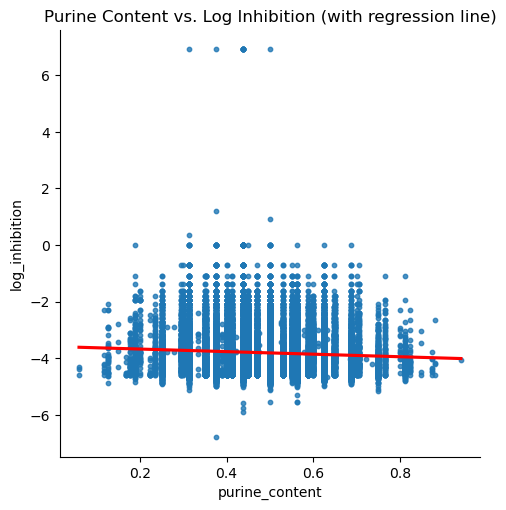

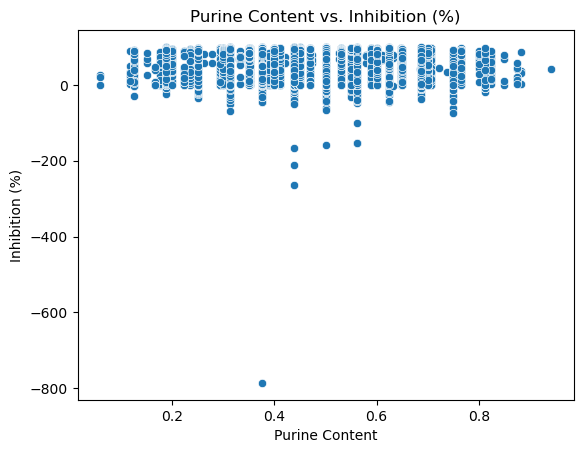

In [67]:
# Test purine content behavior 
print_correlations(filtered, 'purine_content', 'log_inhibition')
print_correlations(filtered, 'purine_content', INHIBITION)  

sns.lmplot(data=filtered, x='purine_content', y='log_inhibition', scatter_kws={'s': 10}, line_kws={"color": "red"})
plt.title('Purine Content vs. Log Inhibition (with regression line)')
plt.show()

sns.scatterplot(data=filtered, x='purine_content', y=INHIBITION)
plt.title('Purine Content vs. Inhibition (%)')
plt.xlabel('Purine Content')
plt.ylabel('Inhibition (%)')
plt.show()

Feature: ggg_counts                         , Pearson: -0.01, p-value: 0.22       Target: log_inhibition                     
Feature: ggg_counts                         , Spearman: -0.01, p-value: 0.15       Target: log_inhibition                     
Feature: ggg_counts                         , Pearson: -0.01, p-value: 0.2        Target: Inhibition(%)                      
Feature: ggg_counts                         , Spearman: -0.01, p-value: 0.15       Target: Inhibition(%)                      


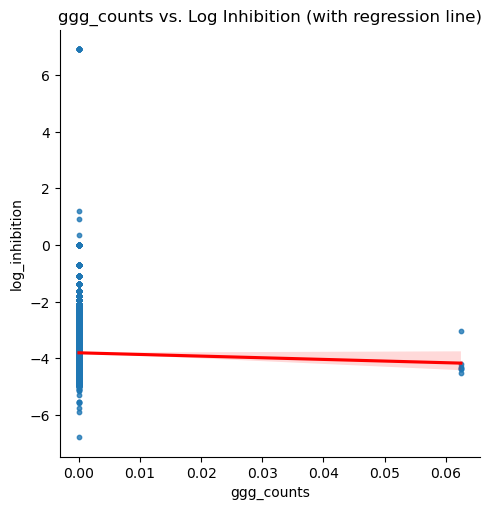

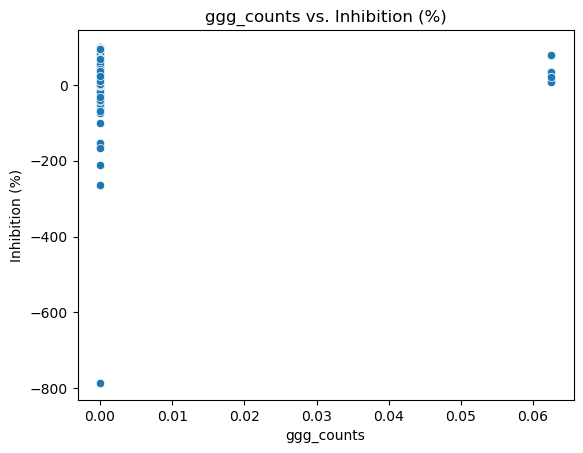

In [68]:
# Test GGG count behavior
print_correlations(filtered,"ggg_counts","log_inhibition")
print_correlations(filtered, 'ggg_counts', INHIBITION)  

sns.lmplot(data=filtered, x='ggg_counts', y='log_inhibition', scatter_kws={'s': 10}, line_kws={"color": "red"})
plt.title('ggg_counts vs. Log Inhibition (with regression line)')
plt.show()

sns.scatterplot(data=filtered, x='ggg_counts', y=INHIBITION)
plt.title('ggg_counts vs. Inhibition (%)')
plt.xlabel('ggg_counts')
plt.ylabel('Inhibition (%)')
plt.show()


Feature: ENC                                , Pearson: -0.00, p-value: 0.85       Target: log_inhibition                     
Feature: ENC                                , Spearman: 0.03 , p-value: 1.8e-05    Target: log_inhibition                     
Feature: ENC                                , Pearson: 0.03 , p-value: 2.9e-05    Target: Inhibition(%)                      
Feature: ENC                                , Spearman: 0.03 , p-value: 1.8e-05    Target: Inhibition(%)                      


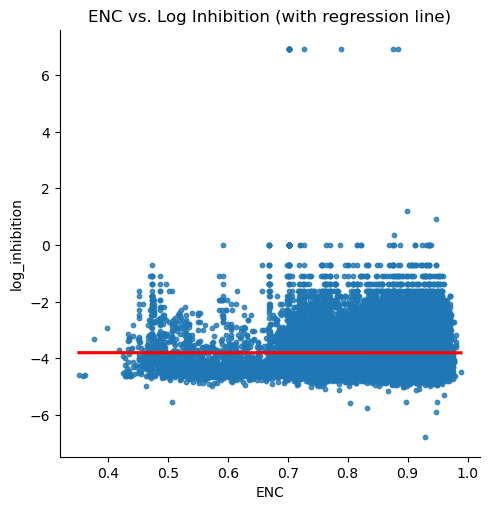

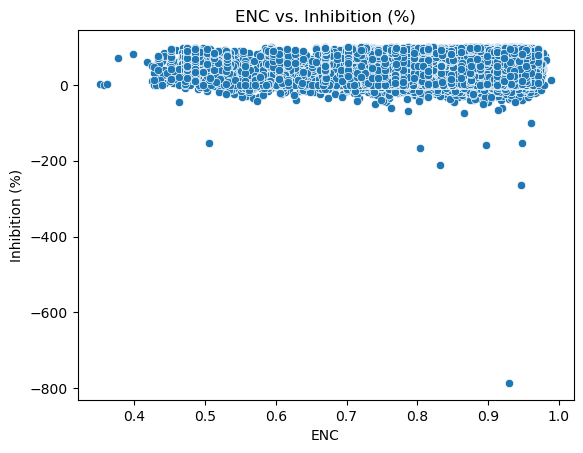

In [69]:
# Test ENC behavior
print_correlations(filtered,"ENC","log_inhibition")
print_correlations(filtered, 'ENC', INHIBITION)  

sns.lmplot(data=filtered, x='ENC', y='log_inhibition', scatter_kws={'s': 10}, line_kws={"color": "red"})
plt.title('ENC vs. Log Inhibition (with regression line)')
plt.show()

sns.scatterplot(data=filtered, x='ENC', y=INHIBITION)
plt.title('ENC vs. Inhibition (%)')
plt.xlabel('ENC')
plt.ylabel('Inhibition (%)')
plt.show()

Features Importence test

In [70]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

rf = RandomForestRegressor(random_state=42)
rf.fit(filtered[features], filtered['log_inhibition'])

# Get feature importances
importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


for index, row in importance_df.iterrows():
    print(f"{row['Feature']:<35} {row['Importance']:.4f}")


sense_start                         0.1816
Treatment_Period(hours)             0.1285
ASO_volume(nM)                      0.0865
log_volume                          0.0862
at_skew                             0.0616
log_density                         0.0558
ENC                                 0.0367
gc_skew                             0.0360
Cell_line_A431                      0.0284
dispersed_repeats_score             0.0215
entropy                             0.0203
flexible_dinucleotide_fraction      0.0201
gc_skew_ends                        0.0194
dinucleotide_entropy                0.0192
Transfection_free uptake            0.0153
purine_content                      0.0144
gc_block_length                     0.0136
hairpin_tm                          0.0129
hairpin_score                       0.0123
Modification_MOE/cEt/5-methylcytosines/deoxy 0.0121
hairpin_dG_energy                   0.0118
tandem_repeats_score                0.0114
Modification_cEt/5-methylcytosines/deoxy 0.01

In [73]:
import pandas as pd

# Create the importance DataFrame directly from the model
importance_df = pd.DataFrame({
    'Feature': rf.feature_names_in_,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Define keyword-based categories
sequence_keywords = ['gc', 'entropy', 'ENC', 'skew', 'repeat', 'hairpin', 'palindromic', 'purine', 'at_skew', 'dinucleotide', 'stop_codon', 'ggg']
experimental_keywords = ['volume', 'density', 'Transfection', 'Treatment']
meta_keywords = ['sense_', 'Modification', 'Cell_line']

# Auto-assign categories
def categorize_feature(feature):
    f = feature.lower()
    if any(k in f for k in sequence_keywords):
        return 'sequence'
    elif any(k in f for k in experimental_keywords):
        return 'experimental'
    elif any(k in f for k in meta_keywords):
        return 'meta'
    else:
        return 'other'

importance_df['Category'] = importance_df['Feature'].apply(categorize_feature)
importance_df['Importance'] = importance_df['Importance'].round(4)

# Display the result
display(importance_df)

,Feature,Importance,Category
0,sense_start,0.1816,meta
5,Treatment_Period(hours),0.1285,other
2,ASO_volume(nM),0.0865,experimental
3,log_volume,0.0862,experimental
49,at_skew,0.0616,sequence
4,log_density,0.0558,experimental
36,ENC,0.0367,other
47,gc_skew,0.0360,sequence
7,Cell_line_A431,0.0284,other
45,dispersed_repeats_score,0.0215,sequence


Pearson Corr:  0.5908213390694455  p_value:  0.0
Spearman Corr:  0.5728260756867355  p_value:  0.0


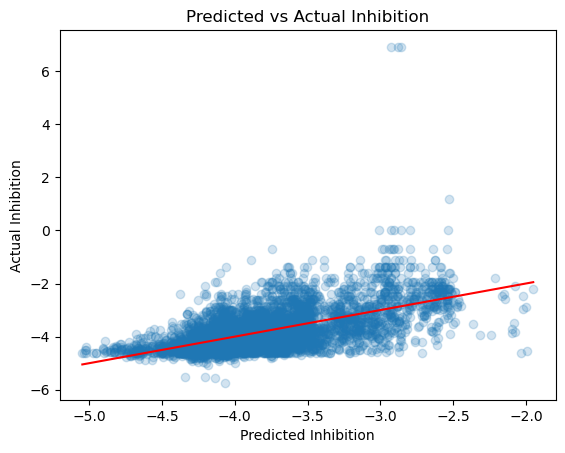

In [32]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr


y_predicted = model.predict(test[features])
y_expected = test['log_inhibition']


corr, p_value = pearsonr(y_expected, y_predicted)
print("Pearson Corr: ", corr, " p_value: ", p_value)
corr, p_value = spearmanr(y_expected, y_predicted)
print("Spearman Corr: ", corr, " p_value: ", p_value)
plt.scatter(y_predicted, y_expected, alpha=0.2)
# plt.scatter(y_test, test['gc_content'])
x = np.linspace(np.min(y_predicted), np.max(y_predicted), 100)
plt.plot(x, x, color='red')

plt.xlabel('Predicted Inhibition')
plt.ylabel('Actual Inhibition')
plt.title('Predicted vs Actual Inhibition')
plt.show()

In [33]:
from sklearn.model_selection import permutation_test_score

score, permutation_scores, pvalue = permutation_test_score(model, X, Y, cv=5, n_permutations=100, n_jobs=-1, scoring='r2')
print(score, permutation_scores, pvalue)

0.34899710216553537 [-0.00446836 -0.00365204 -0.00368158 -0.00181324 -0.00130589 -0.00233936
 -0.0019998  -0.00251754 -0.00337415 -0.00313507 -0.00376048 -0.00345213
 -0.0041143  -0.00381836 -0.00347424 -0.00236052 -0.00326024 -0.00237438
 -0.0013157  -0.00193235 -0.00263802 -0.00395476 -0.00211682 -0.00649595
 -0.00269939 -0.00277859 -0.00282128 -0.00602118 -0.00325102 -0.00286806
 -0.00219914 -0.00304109 -0.0032622  -0.00191109 -0.00272249 -0.00198276
 -0.00366712 -0.00253856 -0.0037021  -0.00304589 -0.00268948 -0.00137278
 -0.00365247 -0.00363432 -0.00340333 -0.00343168 -0.00286738 -0.00274796
 -0.00272112 -0.00347038 -0.00359167 -0.0033361  -0.00265494 -0.00237675
 -0.00293925 -0.00247846 -0.00325274 -0.00336269 -0.00290907 -0.00496371
 -0.00251581 -0.00291997 -0.00324455 -0.00273338 -0.00192552 -0.00310352
 -0.00380675 -0.00213846 -0.00266675 -0.00264128 -0.00189627 -0.00213482
 -0.00309723 -0.00401623 -0.00403008 -0.00314393 -0.00302168 -0.00242699
 -0.00264745 -0.00491385 -0.002

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(filtered[features], filtered['log_inhibition'])

# Get the feature importances
importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [35]:
for index, row in importance_df.iterrows():
    print(f"{row['Feature']:<40} {row['Importance']:.3}")

sense_start                              0.235
Treatment_Period(hours)                  0.129
log_volume                               0.092
ASO_volume(nM)                           0.082
ENC                                      0.0797
log_density                              0.0568
entropy                                  0.0485
dispersed_repeats_score                  0.0442
purine_content                           0.0367
Cell_line_A431                           0.0287
tandem_repeats_score                     0.018
hairpin_score                            0.0174
hairpin_tm                               0.0164
hairpin_dG_energy                        0.0157
Modification_cEt/5-methylcytosines/deoxy 0.0155
Transfection_free uptake                 0.0154
Modification_MOE/cEt/5-methylcytosines/deoxy 0.0121
4 palindromic                            0.0101
sense_length                             0.00883
sense_type_intron                        0.00623
toxic_motif_count                      

In [36]:
# Evaluate the model's choice of features by leaving one out and calculating the score

cv = 5
scorer = spearman_scorer
jobs = -1
feature_importances = []


for feature in feature_base:
    score_without_feature = cross_val_score(model, X.drop(columns=[feature]), Y, cv=cv, scoring=scorer, n_jobs=jobs).mean()
    # print(f"Dropping {feature}: performance drop = {baseline_score - score_without_feature}")
    feature_importances.append((feature, float(baseline_score - score_without_feature)))

print("Done base features")

for i in range(len(one_hot_encoded_features)):
    feature_name = ONE_HOT_FEATURE_NAMES[i]
    feature = one_hot_encoded_features[i]

    score_without_feature = cross_val_score(model, X.drop(columns=feature), Y, cv=cv, scoring=scorer, n_jobs=jobs).mean()
    performance_diff = baseline_score - score_without_feature
    feature_importances.append((feature_name, float(performance_diff)))

sorted_data = sorted(feature_importances, key=lambda x: x[1], reverse=True)
for datum in sorted_data:
    print(datum)

print("The baseline is: ", baseline_score)
print("The spearman baseline is: ", spearman_score)

Done base features
('Cell_line', 0.15737338035835244)
('Transfection', 0.08129181427306126)
('sense_type', 0.03328111923908339)
('Modification', 0.024736417080709783)
('sense_length', 0.02074233191484598)
('sense_start', 0.019771125472514472)
The baseline is:  0.34899710216553537
The spearman baseline is:  0.32870126701949454


In [37]:
from asodesigner.read_human_genome import get_human_genome_annotation_db, read_human_genome_fasta_dict

db = get_human_genome_annotation_db(create_db=False)

ValueError: DB not found in path: /home/nivd1/ASOdesign/data/human/human_v34/dbs/human_gff_basic_introns.db, either download it or create (please consider README.md)

In [ ]:
gene_to_gene_obj = {}

for gene in genes_u:
    gene_to_gene_obj[gene] = db[gene]

In [ ]:
import sys
sys.getsizeof(gene_to_data)

In [ ]:
from pympler import asizeof
asizeof.asizeof(gene_to_data)

In [ ]:
asizeof.asizeof(fasta_dict)

In [ ]:
from consts import HUMAN_DB_BASIC_INTRONS
import gffutils

db = gffutils.FeatureDB(str(HUMAN_DB_BASIC_INTRONS))
db.query('SELECT * ')


# gene_feature = db.features_of_type('gene')
